<a href="https://colab.research.google.com/github/catavasia/ML/blob/master/FIAN2020_seminar01_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Get the Titanic dataset:

In [ ]:
!wget https://github.com/HSE-LAMBDA/MLatFIAN2020/raw/master/seminar01/train.csv

--2020-09-18 15:52:28--  https://github.com/HSE-LAMBDA/MLatFIAN2020/raw/master/seminar01/train.csv
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/HSE-LAMBDA/MLatFIAN2020/master/seminar01/train.csv [following]
--2020-09-18 15:52:28--  https://raw.githubusercontent.com/HSE-LAMBDA/MLatFIAN2020/master/seminar01/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]
Saving to: ‘train.csv.1’

train.csv.1         100%[===================>]  58.89K  --.-KB/s    in 0.02s   

2020-09-18 15:52:28 (2.69 MB/s) - ‘train.csv.1’ saved [60302/60302]



In [ ]:
import pandas as pd
data = pd.read_csv("train.csv", index_col='PassengerId')
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


#### About the data
Here's some of the columns
* Name - a string with person's full name
* Survived - 1 if a person survived the shipwreck, 0 otherwise.
* Pclass - passenger class. Pclass == 3 is cheap'n'cheerful, Pclass == 1 is for moneybags.
* Sex - a person's gender
* Age - age in years, if available
* SibSp - number of siblings on a ship
* Parch - number of parents on a ship
* Fare - ticket cost
* Embarked - port where the passenger embarked
 * C = Cherbourg; Q = Queenstown; S = Southampton

## Task 1

In [ ]:
# Compute survaval rate for each of the three passenger classes (`Pclass` = 1, 2 and 3)
# (can you do it using groupby?)

g = data.groupby('Pclass')

for Pclass, group in g:
  print(Pclass, type(group), group.shape)
print(g.mean())

1 <class 'pandas.core.frame.DataFrame'> (216, 11)
2 <class 'pandas.core.frame.DataFrame'> (184, 11)
3 <class 'pandas.core.frame.DataFrame'> (491, 11)
        Survived        Age     SibSp     Parch       Fare
Pclass                                                    
1       0.629630  38.233441  0.416667  0.356481  84.154687
2       0.472826  29.877630  0.402174  0.380435  20.662183
3       0.242363  25.140620  0.615071  0.393075  13.675550


## Task 2

0 <class 'pandas.core.frame.DataFrame'> (608, 11)
1 <class 'pandas.core.frame.DataFrame'> (209, 11)
2 <class 'pandas.core.frame.DataFrame'> (28, 11)
3 <class 'pandas.core.frame.DataFrame'> (16, 11)
4 <class 'pandas.core.frame.DataFrame'> (18, 11)
5 <class 'pandas.core.frame.DataFrame'> (5, 11)
8 <class 'pandas.core.frame.DataFrame'> (7, 11)
       Survived    Pclass        Age     Parch       Fare
SibSp                                                    
0      0.345395  2.351974  31.397558  0.185855  25.692028
1      0.535885  2.057416  30.089727  0.655502  44.147370
2      0.464286  2.357143  22.620000  0.642857  51.753718
3      0.250000  2.562500  13.916667  1.312500  68.908862
4      0.166667  3.000000   7.055556  1.500000  31.855556
5      0.000000  3.000000  10.200000  2.000000  46.900000
8      0.000000  3.000000        NaN  2.000000  69.550000
SibSp
0    0.185855
1    0.655502
2    0.642857
3    1.312500
4    1.500000
5    2.000000
8    2.000000
Name: Parch, dtype: float64


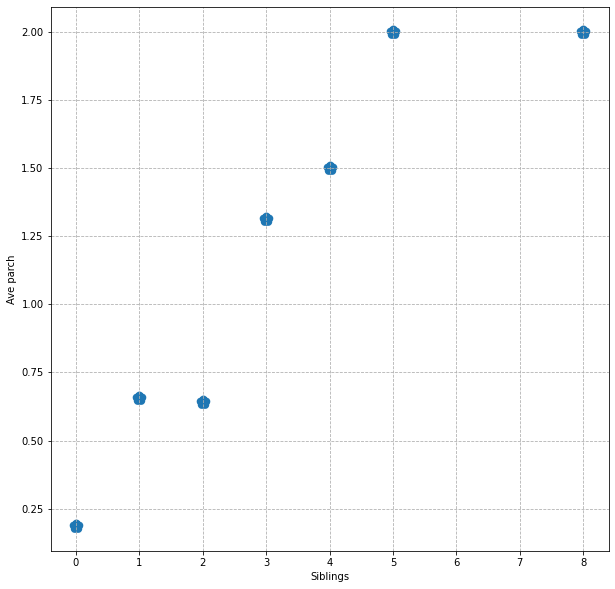

In [ ]:
# Plot the average number of parents onboard (`Parch`) as a function of the 
# number of siblings onboard (`SibSp`)

import numpy as np
import matplotlib.pyplot as plt


g = data.groupby('SibSp')
for Pclass, group in g:
  print(Pclass, type(group), group.shape)
a = g.mean()
print(a)

parch = a.Parch
print(parch)

plt.figure(figsize=(10, 10))
plt.grid(linestyle = '--')
plt.scatter(parch.index, parch, edgecolors = 'face', marker = '*',
            linewidths = 8)
plt.xlabel("Siblings")
plt.ylabel("Ave parch");
plt.show()


#parch = np.mean(data['Parch'])
#print(parch)

#sibl = np.mean(data['SibSp'])
#print(sibl)




## Task 3

In [ ]:
 copy = data.copy()
 copy.head()

dummies = pd.get_dummies(copy.Sex, prefix='Sex')
dummies.head()

data_extended = data_extended = pd.concat([
                      data,
                      dummies
                    ], axis=1)
data_extended.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


In [ ]:
# Build a model with KNeighborsClassifier to get the accuracy of
# at least 0.75 on the validation part of the dataset

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def feature_selection_and_preprocessing(dataset):
  # <YOUR CODE>
  # E.g.:
  copy = dataset.copy()
  dummies = pd.get_dummies(copy.Sex, prefix='Sex')
  data = pd.concat([
                      copy,
                      dummies
                    ], axis=1)
  replaced = data["Age"].fillna(0)
  #data["Fare"] /= data["Fare"].mean()
  data["Age"] = replaced
  features = data[["Fare", "Parch", "Sex_male", "Sex_female"]]

  #features["Fare"] /= features["Fare"].mean()
  #features['Fare'] *= 1
  return features

model = KNeighborsClassifier(
  
    n_neighbors=10
)


# Validation code (do not touch)
data = pd.read_csv("train.csv", index_col='PassengerId')
data_train = data.iloc[:-100]
data_test = data.iloc[-100:]

model.fit(
    feature_selection_and_preprocessing(
        data_train.drop('Survived', axis=1)
    ),
    data_train['Survived']
)

test_predictions = model.predict(
    feature_selection_and_preprocessing(
        data_test.drop('Survived', axis=1)
    )
)
print("Test accuracy:", accuracy_score(
    data_test['Survived'],
    test_predictions
))



Test accuracy: 0.8
PassengerId
792    0
793    0
794    0
795    0
796    0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 100, dtype: int64
PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
787    1
788    0
789    1
790    0
791    0
Name: Survived, Length: 791, dtype: int64


## Task 4

Check how your model from the previous task performs on randomized splits to train / test (with test set of size 100). Plot the histogram of the test error distribution.

*Hint: check sklearn's `sklearn.model_selection.train_test_split` function.*

Test accuracy: 0.8


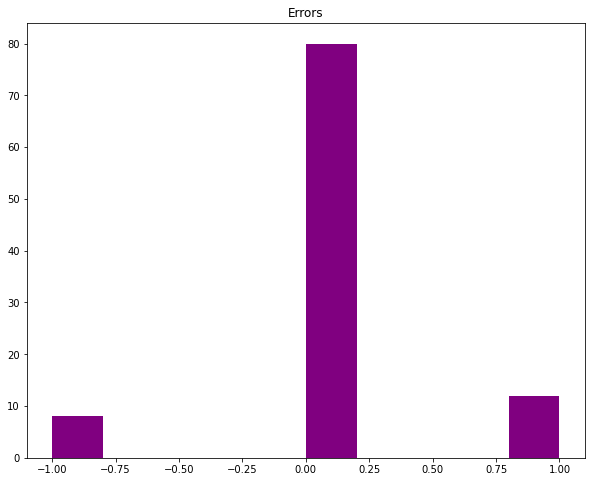

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def feature_selection_and_preprocessing(dataset):
  # <YOUR CODE>
  # E.g.:
  copy = dataset.copy()
  dummies = pd.get_dummies(copy.Sex, prefix='Sex')
  data = pd.concat([
                      copy,
                      dummies
                    ], axis=1)
  replaced = data["Age"].fillna(0)
  #data["Fare"] /= data["Fare"].mean()
  data["Age"] = replaced
  features = data[["Fare", "Parch", "Sex_male", "Sex_female"]]

  #features["Fare"] /= features["Fare"].mean()
  #features['Fare'] *= 1
  return features

model = KNeighborsClassifier(
  
    n_neighbors=10
)

data = pd.read_csv("train.csv", index_col='PassengerId')
train_test_split(data, train_size = 100, test_size = 100)


model.fit(
    feature_selection_and_preprocessing(
        data_train.drop('Survived', axis=1)
    ),
    data_train['Survived']
)

test_predictions = model.predict(
    feature_selection_and_preprocessing(
        data_test.drop('Survived', axis=1)
    )
)
print("Test accuracy:", accuracy_score(
    data_test['Survived'],
    test_predictions
))

#print(data_test['Survived'])
#print(test_predictions)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.hist(data_test['Survived'] - test_predictions, color = 'purple')
plt.title("Errors")
plt.show()